**Basic analysis of titanic dataset using K-Nearest Neighbors**

About dataset


The sinking of the RMS Titanic is one of the most infamous shipwrecks in history.  On April 15, 1912, during her maiden voyage, the Titanic sank after colliding with an iceberg, killing 1502 out of 2224 passengers and crew. This sensational tragedy shocked the international community and led to better safety regulations for ships.

One of the reasons that the shipwreck led to such loss of life was that there were not enough lifeboats for the passengers and crew. Although there was some element of luck involved in surviving the sinking, some groups of people were more likely to survive than others, such as women, children, and the upper-class.

In this challenge, we are to complete the analysis of what sorts of people were likely to survive.

About Decision tree

It is the type of learning algorithm that is mostly used for classification problems.It works for both categorical and continuous dependent variables.Population is split into two or more homogeneous sets.

Let's get started by importing the packages you'll need

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score
from sklearn import tree
%matplotlib inline

The next thing you're doing is reading the csv file by storing it first into a variable using pandas package(pd).

In [2]:
#Load Titanic Dataset
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')


To understand the dataset you have to check information that can be easily deduced from the data

In [3]:
#description
train.head(20)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


Further description

In [4]:
# further description
train.describe()


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


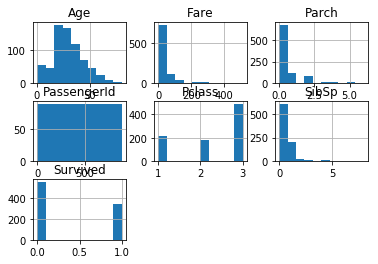

In [6]:
#histogram
train.hist()
plt.show()

In [7]:
train.shape

(891, 12)

In [8]:
train['Age'] = train['Age'].fillna(train['Age'].median())
#filling the misssing column in Age


In [ ]:
train.describe()

In [ ]:
train['Survived'].value_counts()

In [ ]:
train['Died'] = 1 - train['Survived']

In [ ]:
Dead_Survived=train.groupby('Sex').agg('sum')[['Survived', 'Died']]

Dead_Survived.plot(kind='bar', figsize=(7, 10), stacked=True, color=['b', 'r'])
#visualizing number of survived and died based on Sex of passenger

In [ ]:
figure = plt.figure(figsize=(10, 21))
plt.hist([train[train['Survived'] == 1]['Fare'], train[train['Survived'] == 0]['Fare']], stacked=True, color = ['b','r'], bins = 50, label = ['Survived','Dead'])
plt.xlabel('Fare')
plt.ylabel('Number of passengers')
plt.legend();

In [ ]:
# Convert the male and female groups to integer form
train["Sex"][train["Sex"] == "male"] = 0

train["Sex"][train["Sex"] == "female"] = 1




In [ ]:
# Impute the Embarked variable
train['Embarked'] = train['Embarked'].fillna('S')

In [ ]:
# Convert the Embarked classes to integer form
train["Embarked"][train["Embarked"] == "S"] == 0

In [ ]:
# Create the target and features numpy arrays: target, features_one
target = train['Survived'].values
features_one = train[["Pclass", "Sex", "Age", "Fare"]].values


In [ ]:

# Fit your first decision tree: my_tree_one
my_tree_one = tree.DecisionTreeClassifier()
my_tree_one = my_tree_one.fit(features_one, target)


In [ ]:
my_tree_one.feature_importances_

In [ ]:

my_tree_one.score(features_one, target)

In [ ]:
# Impute the missing Fare variable
test['Fare'] = test['Fare'].fillna(test['Fare'].median())

In [ ]:
# Extract the features from the test set: Pclass, Sex, Age, and Fare.
test_features = test[["Pclass", "Sex", "Age", "Fare"]].values


In [ ]:
# Make your prediction using the test set
my_prediction = my_tree_one.predict(test_features)

In [ ]:
# Create a data frame with two columns: PassengerId & Survived
PassengerId =np.array(test["PassengerId"]).astype(int)
my_solution = pd.DataFrame(my_prediction, PassengerId, columns = ["Survived"])


In [ ]:
my_solution.to_csv('submision.csv', index=False)